In this code we compute all the order parameters needed to see the Super-conducting state. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
from Common_codes import correlation_functions_file_18_10_24 as cff
from Common_codes import evolution_video_creator as evc
from Common_codes import generic_codes_18_10_24 as gc    
from Common_codes import class_defn_file_18_10_24 as cdf
from Common_codes import evolution_video_creator as evc
from Common_codes import hamiltonian_derivative_matrices_18_10_24 as hdm

We first need to initialise all the variables and import all the data from the data files.

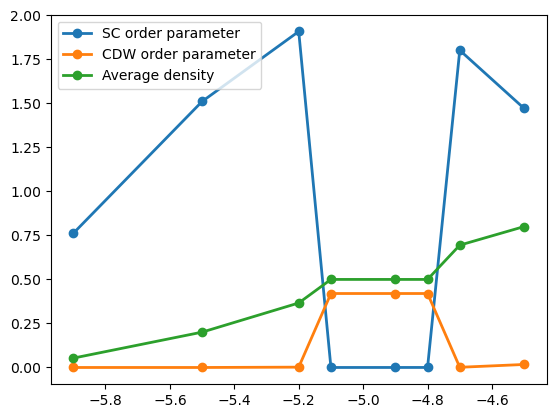

In [17]:
# Extracting the list of files in the directory
# chemical_potential_val = -4.5

from cProfile import label


base_path = os.getcwd()
complete_path = base_path + '\\new data\\Imaginary time evolution\\order parameter data\\'
files = os.listdir(complete_path)
sc_order_parameter_data = np.zeros(len(files))
average_density_data = np.zeros(len(files))
cdw_order_parameter_data = np.zeros(len(files))
mu_data = np.zeros(len(files))
for i in range(len(files)):
    temp_data = np.load(complete_path + files[i])
    sc_order_parameter_data[i] = temp_data[1]
    average_density_data[i] = temp_data[0]  
    cdw_order_parameter_data[i] = temp_data[2]
    mu_data[i] = float(files[i].removesuffix('.npy').removeprefix('order_parameter_mu_'))

plt.plot(mu_data, sc_order_parameter_data,label = 'SC order parameter',linewidth=2,marker='o')
plt.plot(mu_data, cdw_order_parameter_data,label='CDW order parameter',linewidth=2,marker='o')
plt.plot(mu_data, average_density_data,label='Average density',linewidth=2,marker='o')
plt.legend()
plt.savefig('order_parameters_vs_mu.pdf')
plt.show()

In [12]:
mu_data

-4.5

In [2]:

base_path = os.getcwd()
complete_path = base_path + '\\new data\\Imaginary time evolution\\order parameter data\\'
files = os.listdir(complete_path)
sc_order_parameter_data = np.zeros(len(files))

In [8]:
float(files[0].removesuffix('.npy').removeprefix('order_parameter_mu_'))

-4.5

Superconducting order parameter

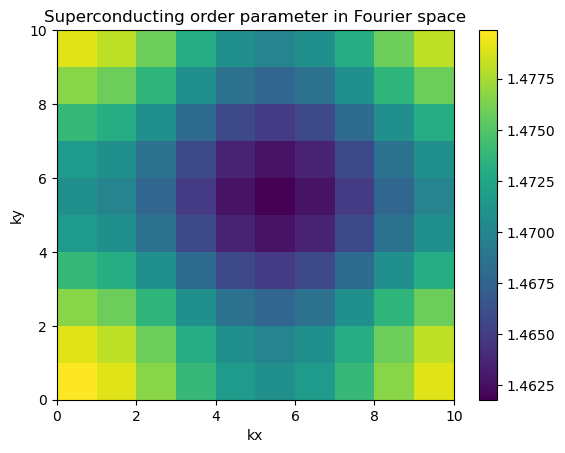

The mean value of the superconducting order parameter is  1.4707975410711456


In [125]:
N_f_spinless = int(N_f/2)

sc_order_parameter_real_space = hdm.Delta_for_h_m(delta_r = delta_r,Gamma_b=Gamma_b, Gamma_m=Gamma_m,input_variables = initial_input_variables,computed_variables= computed_variables_instance)

sc_order_parameter_fourier_space = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),sc_order_parameter_real_space[0:N_f_spinless,N_f_spinless:])

# plt.pcolormesh(np.real(np.reshape(sc_order_parameter_fourier_space, (10,10))) )
plt.pcolormesh(np.abs(np.reshape(sc_order_parameter_fourier_space, (10,10))))
# plt.pcolormesh(np.real(sc_order_parameter_real_space)) 
plt.colorbar()
plt.xlabel("kx")
plt.ylabel("ky")
plt.title("Superconducting order parameter in Fourier space")
plt.show()

sc_mean_value = np.sum(np.abs(sc_order_parameter_fourier_space))/len(sc_order_parameter_fourier_space)
print("The mean value of the superconducting order parameter is ", sc_mean_value)


Density of electrons
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: 0.8002914705008425
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: 0.8002914705008426


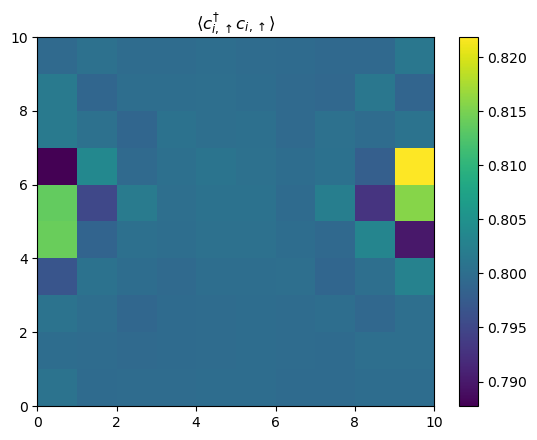

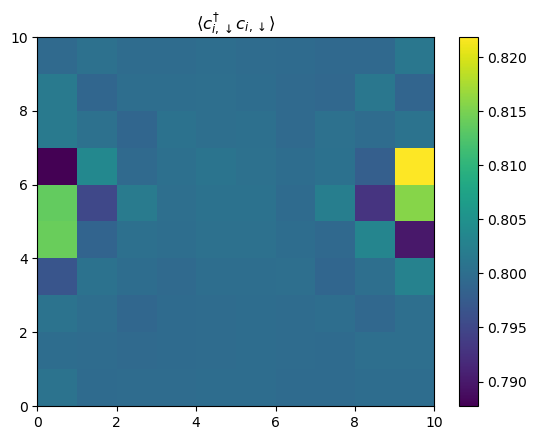

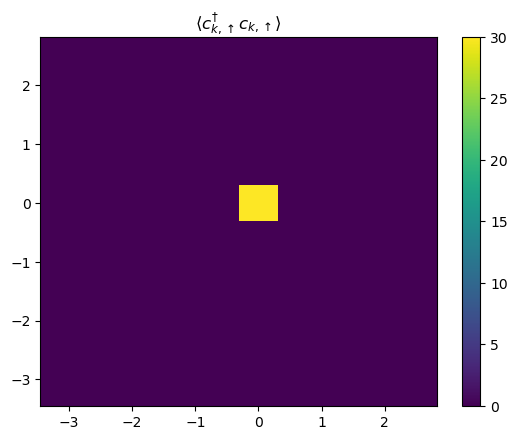

The CDW order paramter is  0.017089328694943118


In [126]:
c_dagger_c_data = cff.c_dagger_c_expectation_value_matrix_creation(Gamma_m,200)
c_c_dagger_data = cff.c_c_dagger_expectation_value_matrix_creation(Gamma_m,200)
c_c_data = cff.c_c_expectation_value_matrix_creation(Gamma_m,200)
c_dagger_c_dagger_data = cff.c_dagger_c_dagger_expectation_value_matrix_creation(Gamma_m,200)

print("Density of electrons")
average_density = np.real( np.sum(np.diag(c_dagger_c_data)[0:int(N_f/2)])/( N_f/2 ) )
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:", average_density)
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:", np.real( np.sum(np.diag(c_dagger_c_data)[int(N_f/2):])/(  N_f/2 ) ) )

# plt.pcolormesh(np.real(np.reshape(np.diag(c_c_data[0:int(N_f/2),int(N_f/2):]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c_{i,\uparrow} c_{i,\downarrow} \rangle$")
# # save_file_name = "c_up_c_down_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# plt.pcolormesh(np.real(np.reshape(np.diag(c_c_data[int(N_f/2):,0:int(N_f/2)]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c_{i,\downarrow} c_{i,\uparrow} \rangle$")
# # save_file_name = "c_down_c_up_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_dagger_data[0:int(N_f/2),int(N_f/2):]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c^{\dagger}_{i,uparrow} c^{\dagger}_{i,\downarrow} \rangle$")
# # save_file_name = "c_dagger_up_c_dagger_down_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_dagger_data[int(N_f/2):,0:int(N_f/2)]),(10,10) ) ) )
# plt.colorbar()
# plt.title(r"$\langle c^{\dagger}_{i,\downarrow} c^{\dagger}_{i,\uparrow} \rangle$")
# # save_file_name = "c_dagger_down_c_dagger_up_diag_mu_"+str(chemical_potential_val)+".pdf"
# # plt.savefig(save_file_name)
# plt.show()

# Plotting the c^{dagger} c expectation values
plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\uparrow} c_{i,\uparrow} \rangle$")
# save_file_name = "c_dagger_up_c_up_diag_mu_"+str(chemical_potential_val)+".pdf"
# plt.savefig(save_file_name)
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\downarrow} c_{i,\downarrow} \rangle$")
# save_file_name = "c_dagger_down_c_down_diag_mu_"+str(chemical_potential_val)+".pdf"
# plt.savefig(save_file_name)
plt.show()


fft_freq = np.fft.fftfreq(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ).shape[0])*2*np.pi
new_fft_freq = np.fft.fftshift(fft_freq)

fourier_transform = np.fft.fft2(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ) -0.5  )
shifted_fourier_transform = np.fft.fftshift(fourier_transform)
X,Y = np.meshgrid(new_fft_freq,new_fft_freq)

plt.pcolormesh(X,Y,np.real(shifted_fourier_transform))
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{k,\uparrow} c_{k,\uparrow} \rangle$")
plt.show()

# average_density = torch.sum(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)])/len(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)])
cdw_order_parameter = (np.max(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) ) -
                       np.min(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) ))/2
# c_dagger_c_data_up_up_fourier_space = 1/N_b*np.einsum('kn,lm,nm -> kl',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)])
# plt.pcolormesh(np.real(c_dagger_c_data_up_up_fourier_space))
# plt.xlabel("k")
# plt.ylabel("k")
# plt.title(r"$\langle c^{\dagger}_{k,\uparrow} c_{k,\uparrow} \rangle$ in Fourier space")
# plt.colorbar()
# plt.show()
print("The CDW order paramter is ",cdw_order_parameter)

In [127]:
np.save("order_parameter_mu_"+str(chemical_potential_val)+".npy",np.array([average_density,sc_mean_value,cdw_order_parameter]))